Немного формализма.

Для каждого $n$ считаем, что вероятностное пространство $\Omega$ состоит из всевозможных случайных векторов выборки $(X_1 , \dots X_n)$, которые порождают (не 1-1) выборочную функцию распределения $F_n$. 

Пусть $F(t) -$  истинная функция распределения. Мы интересуемся событием(в фиксированной точке это событие, а sup представляется как пересечение событий) $A = sup |F_n(t) - F(t)| > eps$. Введем индикаторную случайную величину $I(F_n)$, которая равна единице, если мы попали в событие и нулю иначе. Будем считать выборочное матожидание этого индикатора, которое сходится к настоящему и равно P(A)

In [101]:
import scipy.stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

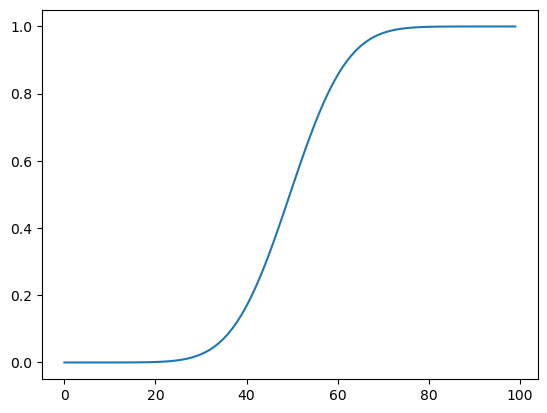

In [102]:
#функция распределения нормального распределения
plt.plot([norm.cdf(x) for x in np.linspace(-5, 5, 100)])

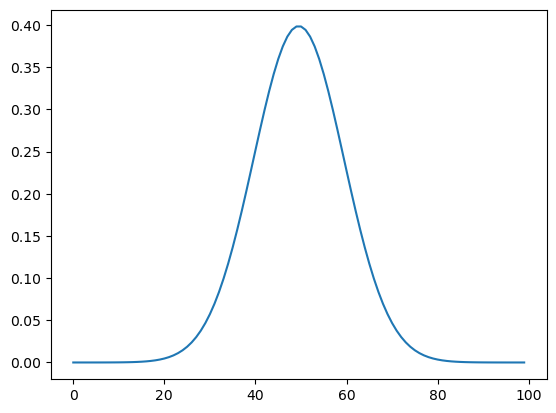

In [103]:
#плотность нормального распределения
plt.plot([norm.pdf(x) for x in np.linspace(-5, 5, 100)])

In [104]:
#сгенерируем данные
data = scipy.stats.norm.rvs(size=10000, loc=0, scale=1,
                            random_state=123)

In [107]:
def calculate_errors(size, x_li, times):
    '''
    Generage %times samples of data, then for each calculate sup|F_n - F|
    Input:
        size = n
        x_li = discrete lattice along X axis
        times = times of repetition
    Output:
        np.array of errors for each data samples
    '''
    
    errors = []
    for _ in range(times):
        data = scipy.stats.norm.rvs(size=size, loc=0, scale=1)
        sdf = stats.ecdf(data)
        error = np.max(abs(sdf.cdf.evaluate(x_li) - norm.cdf(x_li)))
        errors.append(error)
    return np.array(errors), sdf.cdf.evaluate(x_li)

In [115]:
def calculate_proba(size, num_points, eps, plot=False):
    '''
    Input:
        size = size of samples
        num_points = number of points on x axis for sup calculation
        eps = allowed distance between F_n and F
        plot: if true, then plon one of scdf
    
    Input:
        probability of event |F_n - F| < eps for given n = size
    '''
    
    x_li = np.linspace(-3, 3, num_points)

    errors, sdf = calculate_errors(size, x_li, 100)
    proba = (errors > eps).sum()/len(errors)
    if plot:
        plt.plot(sdf)
    return proba

0.7

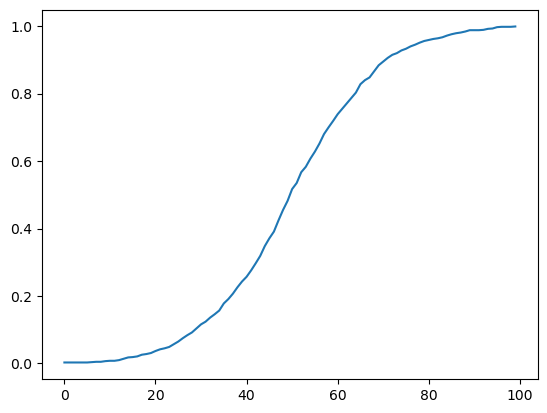

In [116]:
calculate_proba(size=1000, num_points=100, eps=0.02, plot = True)
#Рисуется выборочная функция распределения, значение вызова функции -- вероятность

Зафиксируем достаточно маленький eps и проверим стремление к нулю события P(|F_n(x) - F(x)| > eps)

eps = 0.01

In [121]:
eps = 0.01
size = 0
eps_li = [1]

while eps_li[-1] > 10 ** -4:
    size += 100
    res = calculate_proba(size, 100, eps)
    eps_li.append(res)

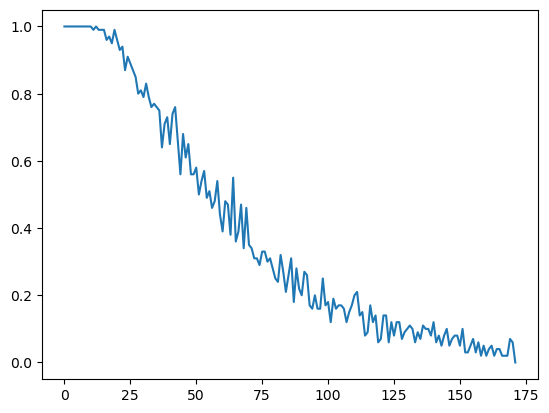

In [122]:
plt.plot(eps_li)

Видно, что вероятность события действительно стремится к нулю